# Decision Trees



## Some beautiful visualisations

Have a look at this elegant demonstration of D3 showing decision
trees at work

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/


## Titanic

In this lab we will explore the passengers on the Titanic again.

In [1]:
# You will want to use the pandas library, and sklearn.tree
import pandas as pd
import sklearn.tree as skt

In [3]:
# Read in the file titanic.csv (which is in the data/ folder)
titanic = pd.read_csv('C:/Users/mohds/SYD_DAT_5/data/titanic.csv', index_col = 'PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
# Since we need numeric data, add another numeric column based
# upon the "Sex" column (e.g. male=0, female=1)
import numpy as np
titanic['Gender'] = titanic.Sex.map({'male':0, 'female':1})

In [7]:
# Either drop rows where the age isn't known, or fill with
# the mean value
titanic_with_age = titanic[titanic.Age.notnull()]

In [9]:
# Create a DecisionTreeClassifier which splits based on 
# entropy with a depth of 1
titanic_classifier = skt.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [11]:
# Try to predicted the 'Survived' column from 'Pclass', 'Age' and gender
titanic_classifier.fit(titanic_with_age[['Pclass', 'Age', 'Gender']], titanic_with_age[['Survived']])
titanic_classifier.predict(titanic_with_age[['Pclass', 'Age', 'Gender']])

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1,

In [12]:
# Use the feature_importances_ to identify what was the most important
# criteria in survival on the Titanic
titanic_classifier.feature_importances_

array([ 0.,  0.,  1.])

In [14]:
# Create a deeper DecisionTreeClassifier (e.g. max_depth=3)
new_titanic_classifier = skt.DecisionTreeClassifier(criterion='entropy', max_depth=3)
new_titanic_classifier.fit(titanic_with_age[['Pclass', 'Age', 'Gender']], titanic_with_age[['Survived']])
new_titanic_classifier.predict(titanic_with_age[['Pclass', 'Age', 'Gender']])
new_titanic_classifier.feature_importances_

array([ 0.28604303,  0.14160304,  0.57235392])

In [28]:
# We would like to display this as a tree. 
# import StringIO and create a StringIO object which we
# can use as a file
import StringIO
file_obj = StringIO.StringIO()

In [29]:
# import the sklearn.tree library and use the export_graphviz
# method to write your deeper decision tree out to the StringIO
# file object
skt.export_graphviz(new_titanic_classifier, out_file=file_obj)

In [30]:
# confirm that there is some data in your StringIO object
# using the .getvalue() method. You might want to print it
# as it has a lot of newline characters in it
print file_obj.getvalue()

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 0.5\nentropy = 0.9744\nsamples = 714\nvalue = [424, 290]"] ;
1 [label="X[0] <= 1.5\nentropy = 0.7324\nsamples = 453\nvalue = [360, 93]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 53.0\nentropy = 0.9686\nsamples = 101\nvalue = [61, 40]"] ;
1 -> 2 ;
3 [label="entropy = 0.9971\nsamples = 79\nvalue = [42, 37]"] ;
2 -> 3 ;
4 [label="entropy = 0.5746\nsamples = 22\nvalue = [19, 3]"] ;
2 -> 4 ;
5 [label="X[1] <= 9.5\nentropy = 0.6113\nsamples = 352\nvalue = [299, 53]"] ;
1 -> 5 ;
6 [label="entropy = 0.9871\nsamples = 30\nvalue = [13, 17]"] ;
5 -> 6 ;
7 [label="entropy = 0.5053\nsamples = 322\nvalue = [286, 36]"] ;
5 -> 7 ;
8 [label="X[0] <= 2.5\nentropy = 0.8036\nsamples = 261\nvalue = [64, 197]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[1] <= 2.5\nentropy = 0.3138\nsamples = 159\nvalue = [9, 150]"] ;
8 -> 9 ;
10 [label="entropy = 1.0\nsamples = 2\nvalue = [1, 1]"] 

In [31]:
# import the pydot library and use the function graph_from_dot_data
# to create a graph object
# If it all goes very badly, with lots of errors, then try pyplot2 instead
# and look at this:
# http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will/17902926#17902926
import pydotplus
graph_titanic = pydotplus.graph_from_dot_data(file_obj.getvalue())

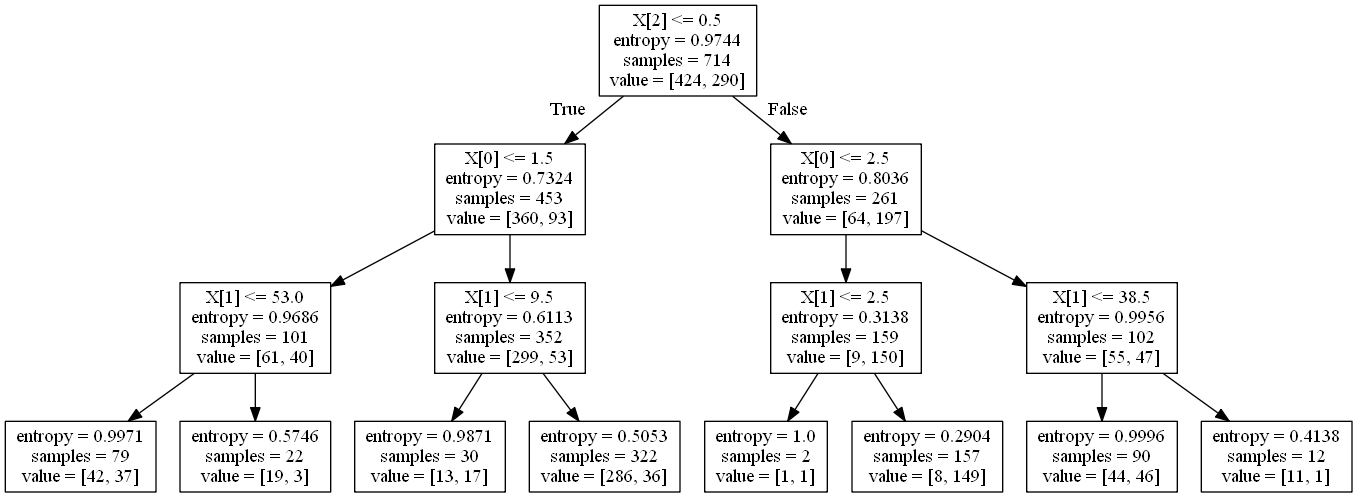

In [32]:
# import IPython.display and create an Image object from the graph
# object. It should display automatically inline here.
import IPython.display
IPython.display.Image(graph_titanic.create_png())

In [33]:
# Trace through this graph manually.
# What would you expect would happen
# to a 26-year old woman in first class?
# Compare that to the predict method's output.
new_titanic_classifier.predict([[1, 26, 1]])

array([1], dtype=int64)

In [35]:
# Did it get it right? What happened to Miss. Ellen "Nellie" Barber?
titanic_with_age[titanic_with_age.Name == 'Barber, Miss. Ellen "Nellie"']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,,
291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,NaN,S,1
